# File containing the process of creating a dataset of 5 Athens Stock Exchange stocks, applying Z-score normalization

In [ ]:
# Importing libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_pickle('/Users/lamprosganias/Downloads/datedata/2024_02_03_04/1 - Data Mining/stocks.pkl')
data

,A,B,G,L,M,N,O
TPEIR,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...
MYTIL,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...
OPAP,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...
PPC,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...
HTO,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...,Publication Timestamp Subcategory ...


In [3]:
# Keeping only LOB data of each stock as Dataframes
data_frames = {}
for index in data.index:
    for column in data:
        if column == "B":
            key = f'{index}_{column}'
            data_frames[key] = data.at[index, column]

def get_stock_data(index, column):
    key = f'{index}_{column}'
    if key in data_frames:
        return data_frames[key]
    else:
        return None

for index in data.index:
    for column in data.columns:
        if column == "B":
            if not data.at[index,column].empty:
                variable_name = f'{index}_{column}'
                locals()[variable_name] = get_stock_data(index, column)
                print(variable_name)

TPEIR_B
MYTIL_B
OPAP_B
PPC_B
HTO_B


In [ ]:
def filter_largest_datasets(datasets_dict, top_n=5):
    """
    Filters the top N datasets with the largest length of data and returns their names.
    
    Parameters:
        datasets_dict (dict): A dictionary where keys are dataset names and values are datasets.
        top_n (int): Number of datasets to keep with the largest lengths. Default is 5.
    
    Returns:
        list: The names of the datasets with the largest lengths.
    """
    sorted_datasets = sorted(datasets_dict.items(), key=lambda item: len(item[1]), reverse=True)
    
    return [name for name, _ in sorted_datasets[:top_n]]

datasets_dict = {
    "TPEIR_B": TPEIR_B,
    "MYTIL_B": MYTIL_B,
    "OPAP_B": OPAP_B,
    "PPC_B": PPC_B,
    "HTO_B": HTO_B
}
largest_datasets_names = filter_largest_datasets(datasets_dict, top_n=10)

print("Largest datasets:")
for name in largest_datasets_names:
    print(f"{name} with length {len(datasets_dict[name])}")

Largest datasets:
TPEIR_B with length 995550
PPC_B with length 414375
MYTIL_B with length 398478
HTO_B with length 366083
OPAP_B with length 363376


## Cleaning procedure on each stock's dataset.

In [ ]:
# Removing columns, duplicates and NaN values that are not needed.

largest_datasets = [TPEIR_B, MYTIL_B, OPAP_B, PPC_B, HTO_B]

for i, df in enumerate(largest_datasets):
    df = df.drop(columns=["Subcategory", "Symbol", "Quote Levels"])
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.sort_values(by=['Publication Timestamp'])
    df = df.set_index('Publication Timestamp')
    largest_datasets[i] = df

In [ ]:
# Keeping only the columns that are needed.

columns_to_keep = [
    'bid_price_1', 'bid_size_1',
    'ask_price_1', 'ask_size_1',  
    'bid_price_2', 'bid_size_2',  
    'ask_price_2', 'ask_size_2',  
    'bid_price_3', 'bid_size_3', 
    'ask_price_3', 'ask_size_3',  
    'bid_price_4', 'bid_size_4',  
    'ask_price_4', 'ask_size_4',  
    'bid_price_5', 'bid_size_5', 
    'ask_price_5', 'ask_size_5',  
    'bid_price_6', 'bid_size_6',  
    'ask_price_6', 'ask_size_6',  
    'bid_price_7', 'bid_size_7', 
    'ask_price_7', 'ask_size_7',  
    'bid_price_8', 'bid_size_8', 
    'ask_price_8', 'ask_size_8', 
    'bid_price_9', 'bid_size_9', 
    'ask_price_9', 'ask_size_9',  
    'bid_price_10', 'bid_size_10',  
    'ask_price_10', 'ask_size_10', 
]

for i, df in enumerate(largest_datasets):
    df = df[columns_to_keep]
    df = df.dropna()
    largest_datasets[i] = df


In [ ]:
# Applying multiplication to the bid and ask prices to have integers.

for i, df in enumerate(largest_datasets):
    for j in range(1, 11):
            df[f'bid_price_{j}'] *= 1000
            df[f'ask_price_{j}'] *= 1000
    largest_datasets[i] = df

In [ ]:
# Convert data types to integers.

for i, df in enumerate(largest_datasets):
    # Check if the DataFrame has more than 40 rows
    if df.shape[1] > 40:
        df.iloc[:40, :] = df.iloc[:40, :].astype(int)
    else:
        df.iloc[:, :] = df.astype(int)
    largest_datasets[i] = df

/var/folders/10/ylf9z1m51bq7ks0c7rh20vfw0000gn/T/ipykernel_2201/3708625481.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = df.astype(int)


In [ ]:
# Filtering the data between 10:30 and 17:00.

for i, df in enumerate(largest_datasets):
    df = df.between_time('10:30', '17:00')
    largest_datasets[i] = df

## We create event representations for every 10 timestamps.

In [11]:
def aggregate_data(df, events_per_aggregation=10):
    """
    Aggregate every fixed number of events into one representation.
    
    Parameters:
    - df: DataFrame containing the LOB data.
    - events_per_aggregation: Number of events to aggregate into one representation.
    
    Returns:
    - Aggregated DataFrame.
    """
    n = len(df)
    n_aggregations = n // events_per_aggregation
    aggregated_data = []
    new_indices = []
    
    for i in range(n_aggregations):
        start = i * events_per_aggregation
        end = start + events_per_aggregation
        chunk = df.iloc[start:end]
        
        aggregated_row = {}
        for col in df.columns:
            if 'price' in col:
                aggregated_row[col] = chunk[col].mean()
            elif 'size' in col:
                aggregated_row[col] = chunk[col].sum()
        
        aggregated_data.append(aggregated_row)
        
        new_indices.append(chunk.index[-1])
    
    aggregated_df = pd.DataFrame(aggregated_data, index=new_indices)
    
    return aggregated_df

largest_datasets = [aggregate_data(df) for df in largest_datasets]


In [ ]:
def apply_ema(df, columns, span):
    """
    Applies Exponential Moving Average (EMA) to specified columns.

    Parameters:
    - df: DataFrame containing the data.
    - columns: List of column names to apply EMA.
    - span: Span for the EMA.

    Returns:
    - DataFrame with EMA applied to specified columns.
    """
    df_ema = df.copy()
    for col in columns:
        df_ema[col] = df_ema[col].ewm(span=span, adjust=False).mean()
    return df_ema

# List of columns to apply EMA
price_columns = [f'bid_price_{i}' for i in range(1, 11)] + [f'ask_price_{i}' for i in range(1, 11)]

span = 10 
for i, df in enumerate(largest_datasets):
    df = apply_ema(df, price_columns, span)
    largest_datasets[i] = df

# Z-score normalization (Standardization) of previous day


In [15]:
# Apply normalization and convert the first 40 rows to integers
def previous_day_zscore_normalize(df):
    df_normalized = df.copy()
    
    # Extracting the date part from the timestamp
    df['date'] = df.index.date
    
    # Group by date to get daily statistics
    daily_stats = df.groupby('date').agg(['mean', 'std'])
    
    # Flatten the multi-index columns
    daily_stats.columns = ['_'.join(col) for col in daily_stats.columns]
    
    # Shift the statistics by one day
    daily_stats_shifted = daily_stats.shift(1)
    
    # Fill the first row of shifted statistics with the second row's values
    daily_stats_shifted.iloc[0] = daily_stats_shifted.iloc[1]
    
    # Join the shifted statistics back to the original dataframe
    df = df.join(daily_stats_shifted, on='date', rsuffix='_shifted')
    
    for column in df.iloc[:,:40]:
        mean_col = column + '_mean'
        std_col = column + '_std'

        df_normalized[column] = (df[column] - df[mean_col]) / df[std_col]
        df_normalized[column] = df_normalized[column].round(5)
    # Keep only the first 40 columns
    df_normalized = df_normalized.iloc[:, :40]
    
    # Check for extremely large values and handle them
    df_normalized[df_normalized > 1e5] = 1e5
    df_normalized[df_normalized < -1e5] = -1e5
    
    return df_normalized

largest_datasets_norm = largest_datasets.copy()

for i, df in enumerate(largest_datasets_norm):
    # Normalize the data
    df = previous_day_zscore_normalize(df)
    
    # Replace non-finite values with zeros before converting to integers
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    
    largest_datasets_norm[i] = df


In [17]:
# Calculate the mid_price and round it to 5 decimal places
for i, df in enumerate(largest_datasets_norm):
    df['mid_price'] = ((df["bid_price_1"] + df["ask_price_1"]) / 2).round(5)
    largest_datasets_norm[i] = df

In [18]:
case1_datasets = largest_datasets_norm.copy()

# Finding the best thresholds for each horizon.

In [19]:
# Define the projection horizons
horizons = [1, 2, 3, 5, 10]

# Adjust the range of threshold values to test based on observed distribution
thresholds = np.linspace(0, 0.1, 10000)

# Combine all datasets into a single dataframe for threshold optimization
combined_data_1 = pd.concat(case1_datasets, axis=0)


In [20]:
# Function to calculate labels for a given threshold and horizon
def calculate_labels(df, horizon, threshold):
    labels = pd.DataFrame(index=df.index)
    if horizon == 1:
        future_mid_prices = df['mid_price'].shift(-horizon)
    else:
        future_mid_prices = df['mid_price'].rolling(window=horizon, min_periods=1).mean().shift(-horizon)
    current_mid_prices = df['mid_price']
    percentage_change = ((future_mid_prices - current_mid_prices) / abs(current_mid_prices))
    label_column = f'label_{horizon}'
    labels[label_column] = 2  # Default label 2
    labels.loc[percentage_change >= threshold, label_column] = 1
    labels.loc[percentage_change <= -threshold, label_column] = 3
    return labels

# Initialize a dictionary to store the best threshold for each horizon
best_thresholds = {}

# Iterate over each horizon
for horizon in horizons:
    best_balance = float('inf')
    best_threshold = None
    
    # Iterate over each threshold
    for threshold in thresholds:
        concatenated_labels = pd.DataFrame()
        
        # Calculate labels for each dataset in case1_datasets using the current threshold
        for df in case1_datasets:
            labels = calculate_labels(df, horizon, threshold)
            df_with_labels = df.join(labels)
            concatenated_labels = pd.concat([concatenated_labels, df_with_labels], axis=0)
        
        # Evaluate the balance of the labels
        label_counts = concatenated_labels[f'label_{horizon}'].value_counts(normalize=True)
        balance = abs(label_counts.get(1, 0.0) - 1/3) + abs(label_counts.get(2, 0.0) - 1/3) + abs(label_counts.get(3, 0.0) - 1/3)
        
        # Update the best threshold if the current one is better balanced
        if balance < best_balance:
            best_balance = balance
            best_threshold = threshold
    
    # Store the best threshold for the current horizon
    best_thresholds[horizon] = best_threshold

# Output the best thresholds for each horizon
print("Best thresholds for each horizon in case1 datasets:")
print(best_thresholds)

Best thresholds for each horizon in case1 datasets:
{1: 0.00428042804280428, 2: 0.006290629062906291, 3: 0.00824082408240824, 5: 0.012051205120512052, 10: 0.020692069206920693}


In [21]:
# Apply the best thresholds to add label columns to each dataset in case1_datasets
for i, df in enumerate(case1_datasets):
    for horizon in horizons:
        labels = calculate_labels(df, horizon, best_thresholds[horizon])
        df = df.join(labels)
        case1_datasets[i] = df
        

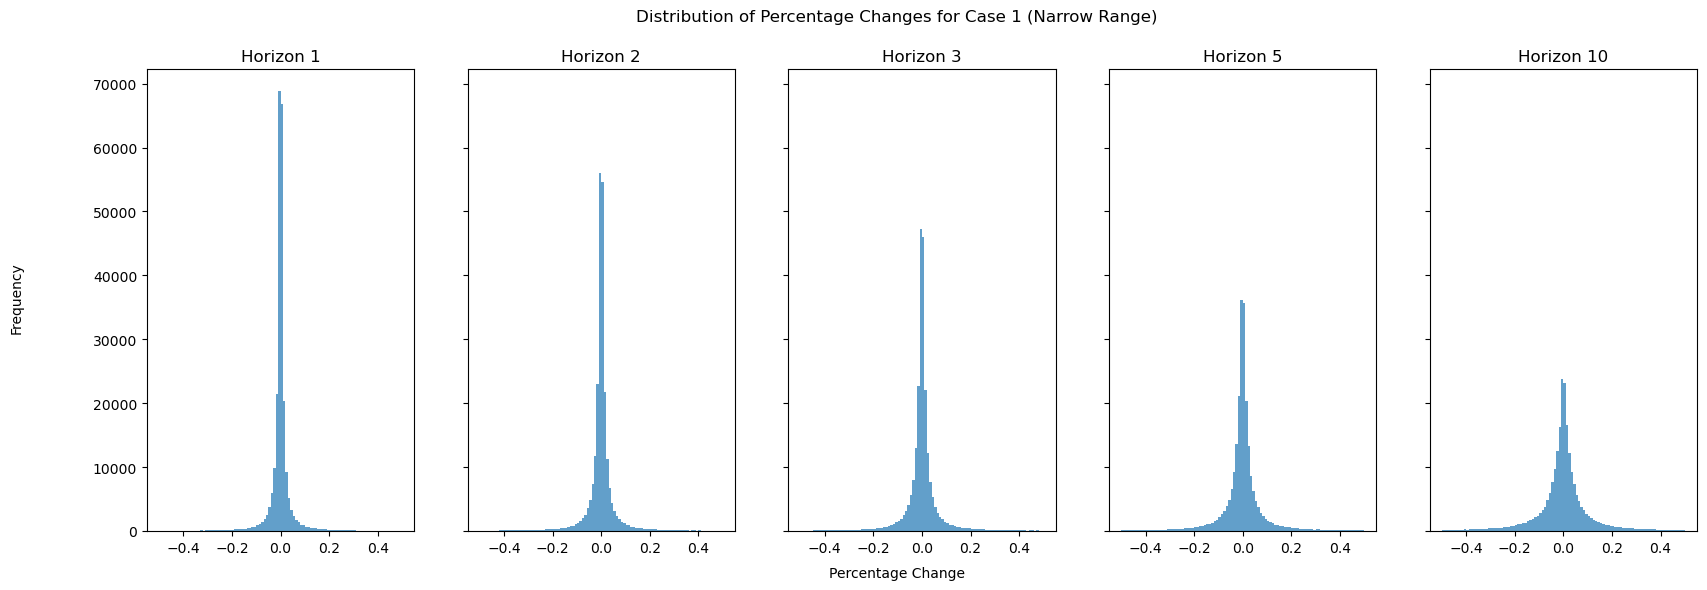

In [26]:
# Function to calculate percentage changes
def calculate_percentage_changes(df, horizons):
    percentage_changes = {}
    for k in horizons:
        if k == 1:
            future_mid_prices = df['mid_price'].shift(-k)
        else:
            future_mid_prices = df['mid_price'].rolling(window=k, min_periods=1).mean().shift(-k)
        current_mid_prices = df['mid_price']
        percentage_change = ((future_mid_prices - current_mid_prices) / abs(current_mid_prices))
        percentage_changes[k] = percentage_change.dropna()
    return percentage_changes

# Initialize dictionaries to store percentage changes
percentage_changes_case1 = {k: pd.Series(dtype=float) for k in horizons}

# Calculate percentage changes for each dataset in case1_datasets
for df in case1_datasets:
    pct_changes = calculate_percentage_changes(df, horizons)
    for k in horizons:
        percentage_changes_case1[k] = pd.concat([percentage_changes_case1[k], pct_changes[k]])

fig, axes = plt.subplots(nrows=1, ncols=len(horizons), figsize=(20, 6), sharey=True)
for ax, k in zip(axes, horizons):
    ax.hist(percentage_changes_case1[k], bins=100, range=(-0.5, 0.5), alpha=0.7)
    ax.set_title(f'Horizon {k}')
    
# Set common labels
fig.suptitle('Distribution of Percentage Changes for Case 1 (Narrow Range)')
fig.text(0.5, 0.04, 'Percentage Change', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

plt.show()


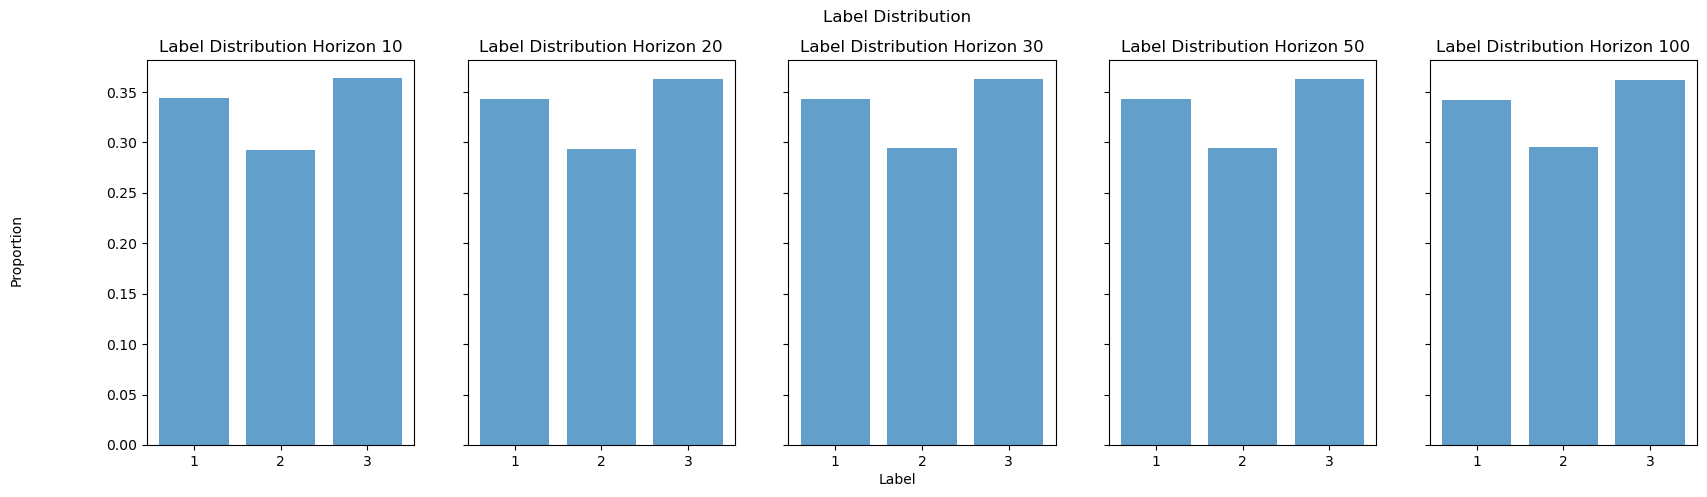

In [ ]:
# Visualize the label distribution for case1_datasets
fig, axes = plt.subplots(nrows=1, ncols=len(horizons), figsize=(20, 5), sharey=True)
for ax, k in zip(axes, horizons):
    label_counts = [df[f'label_{k}'].value_counts(normalize=True) for df in case1_datasets]
    combined_label_counts = sum(label_counts) / len(case1_datasets)
    ax.bar(combined_label_counts.index, combined_label_counts.values, alpha=0.7)
    ax.set_title(f'Label Distribution Horizon {k*10}')
    
fig.suptitle('Label Distribution')
fig.text(0.5, 0.04, 'Label', ha='center', va='center')
fig.text(0.06, 0.5, 'Proportion', ha='center', va='center', rotation='vertical')
plt.show()

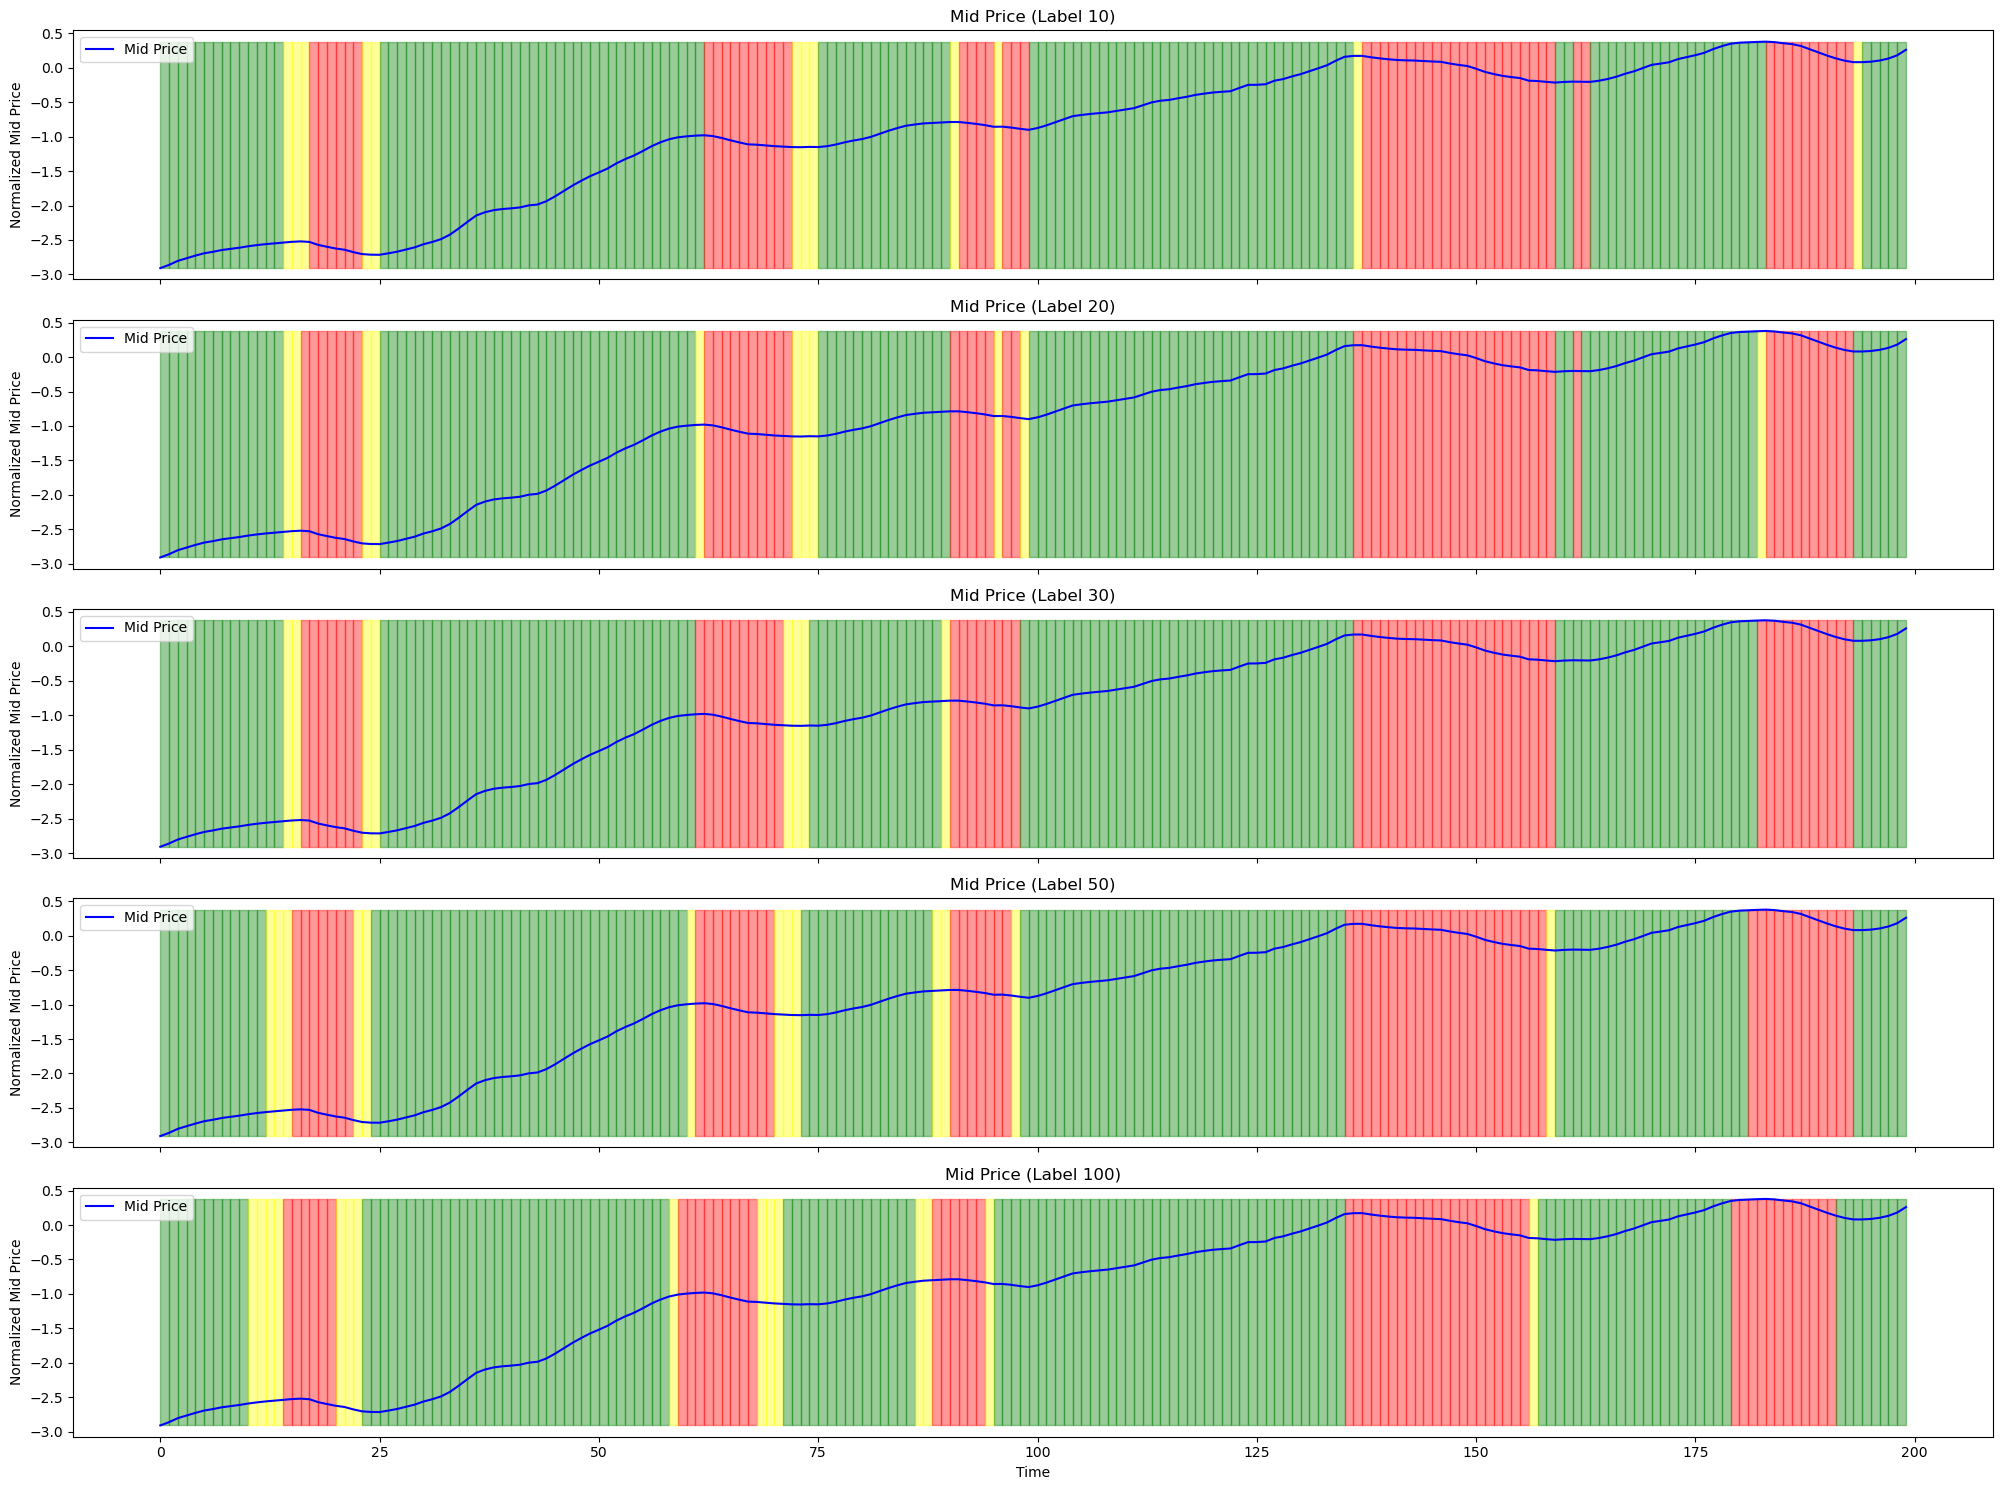

In [31]:
# For demonstration, let's use the first dataset in each case
df_case1 = case1_datasets[0]

# Limit to the first 200 rows for a clearer visualization
df_case1 = df_case1.iloc[:200]

# Extract the normalized mid_price for case1
mid_price_normalized_case1 = df_case1['mid_price']

# Convert the DataFrame indices to numeric ranges for a continuous x-axis
df_case1 = df_case1.reset_index()
x_case1 = df_case1.index

# Define colors for the background based on labels
colors = {1: 'green', 2: 'yellow', 3: 'red'}

fig, axes = plt.subplots(len(horizons), 1, figsize=(20, 3 * len(horizons)), sharex=True)

for i, k in enumerate(horizons):
    labels_case1 = df_case1[f'label_{k}']
    ax = axes[i]
    
    # Plot the mid_price
    ax.plot(x_case1, mid_price_normalized_case1.values, color='blue', label='Mid Price')
    
    # Color-code the background based on labels
    for j in range(len(x_case1) - 1):
        ax.fill_between(x_case1[j:j+2], mid_price_normalized_case1.min(), mid_price_normalized_case1.max(), 
                        color=colors[labels_case1.iloc[j]], alpha=0.4)
    
    # Set title and labels
    ax.set_title(f'Mid Price (Label {k*10})')
    ax.set_ylabel('Normalized Mid Price')
    ax.legend()

# Set common x-label
plt.xlabel('Time')
plt.tight_layout()
plt.show()


In [29]:
# Define the date range for training and testing
train_start_date = '2024-01-31'
train_end_date = '2024-04-01'
test_start_date = '2024-04-01'
test_end_date = '2024-04-29'

# Combine the first 5 datasets
combined_data_1 = pd.concat(case1_datasets[:5])

if combined_data_1.shape[0] > 5:
    combined_data_1.iloc[:-5, :] = combined_data_1.iloc[:-5, :].round(5)
    
# Ensure the 'Publication Timestamp' is a datetime index if not already
combined_data_1.index = pd.to_datetime(combined_data_1.index)
combined_data_1 = combined_data_1.sort_index()

# Filter the rows for the training set
trainig_data_1 = combined_data_1.loc[train_start_date:train_end_date]
trainig_data_1 = trainig_data_1.drop(columns="mid_price")
trainig_data_1 = trainig_data_1.T
# Filter the rows for the testing set
testing_data_1 = combined_data_1.loc[test_start_date:test_end_date]
testing_data_1 = testing_data_1.drop(columns="mid_price")
testing_data_1 = testing_data_1.T


In [30]:
# Extract the last 5 columns which are the labels
labels_combined_data_1 = combined_data_1.iloc[:, -5:]

# Compute value counts for each label column in combined_data_1
value_counts_1 = {col: labels_combined_data_1[col].value_counts() for col in labels_combined_data_1.columns}
df_value_counts_1 = pd.DataFrame(value_counts_1).fillna(0).astype(int)

# Combine the value counts into a single DataFrame for display
combined_value_counts = pd.concat([df_value_counts_1], axis=1, keys=['Data 1'])
combined_value_counts


Data 1                                 
  label_1 label_2 label_3 label_5 label_10
3   84040   84021   84054   84097    84089
2   81902   81977   81932   81932    81941
1   79857   79801   79813   79770    79769

In [ ]:
# Save the training data to a text file without headers and index
trainig_data_1.to_csv('train_case1.txt', header=False, index=False, sep=' ')

# Save the testing data to a text file without headers and index
testing_data_1.to_csv('test_case1.txt', header=False, index=False, sep=' ')
